# Intro to Python: Exercise 2

## Pairwise Distances in the Plane

One application of machine learning to computer vision is interest point tracking. The location of corners in an image is tracked along subsequent frames of a video signal. In this context, one is often interested in the pairwise distance of all points in the first frame to all points in the second frame. Matching points according to minimal distance is a simple heuristic that works well if many interest points are found in both frames and perturbations are small.
Write a function that accepts two matrices P ∈ R<sup>p×2</sup>,Q ∈ R<sup>q×2</sup> as input, where each row contains the (x,y) coordinates of an interest point. Note that the number of points (p and q) do not have to be equal. As output, compute the pairwise distances of all points in P to all points in Q and collect them in matrix D. Element D<sub>i,j</sub> is the Euclidean distance of the i-th point in P to the j-th point in Q.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [3]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [4]:
def naive(p, q):
    ''' 
    using for loop
    '''
    len_p = np.shape(p)[0]
    len_q = np.shape(q)[0]
    d = np.zeros((len_p,len_q))
    for i in range(len_p):
        for j in range(len_q):
            d[i,j] = np.linalg.norm(p[i]-q[j])
    return d

naive(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [5]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [6]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [13]:
def with_indices(p, q):
    '''
    using indices/ravel
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    ravelled_p = p[rows.ravel()]
    ravelled_q = q[cols.ravel()]
    ravelled_vec = ravelled_p - ravelled_q
    ravelled_d  = np.sqrt(ravelled_vec[:,0]**2 + ravelled_vec[:,1]**2)
    d = np.reshape(ravelled_d,(p.shape[0], q.shape[0]))
    return d

with_indices(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [15]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

scipy_version(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Numpy Magic

In [17]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

tensor_broadcasting(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

# Compare methods

In [18]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

62.3 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.73 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
707 µs ± 73.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
7.48 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


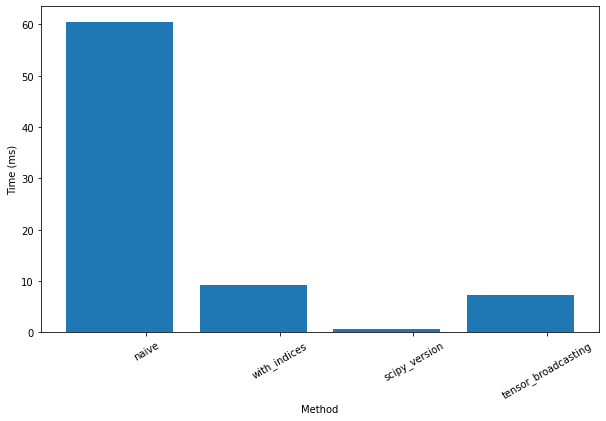

In [19]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()